In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf

In [2]:
file_loc = 'J0053_LRIS_spectra/*'

In [3]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'cleaned' in p and 'J0053' in p:
        file_list.append(p)
        frame = p.split('_')[-2][3:]
        out_file.append('J0053_LRIS_spectra/spec1d_J0053_lris_frame'+ frame)

In [4]:
file_list

['J0053_LRIS_spectra/J0053_r0026b_cleaned.fits',
 'J0053_LRIS_spectra/J0053_r0028-_cleaned.fits',
 'J0053_LRIS_spectra/J0053_r0026a_cleaned.fits',
 'J0053_LRIS_spectra/J0053_r0027-_cleaned.fits']

In [5]:
spec1 = spec2d.Spec2d(file_list[2], hext=0, varext=1 )#xtrim=[11, 35]
spec2 = spec2d.Spec2d(file_list[0], hext=0, varext=1)#, xtrim=[11, 36])
spec3 = spec2d.Spec2d(file_list[3], hext=0, varext=1)#, xtrim=[9, 31])
spec4 = spec2d.Spec2d(file_list[1], hext=0, varext=1)#, xtrim=[9, 30])

spec_list = [spec1, spec2, spec3, spec4]


Loading file J0053_LRIS_spectra/J0053_r0026a_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0053_LRIS_spectra/J0053_r0026a_cleaned.fits (HDU=0)
Final data dimensions (x y): 46 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 46


Loading file J0053_LRIS_spectra/J0053_r0026b_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0053_LRIS_spectra/J0053_r0026b_cleaned.fits (HDU=0)
Final data dimensions (x y): 46 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 46


Loading file J0053_LRIS_spectra/J0053_r0027-_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0053_LRIS_spectra/J0053_r0027-_cleaned.fits (HDU=0)
Final data dimensions (x y): 46 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 46


Loading file J0053_LRIS_spectra/J0053_r0028-_cleaned.fits
-----------------------------


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 66 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


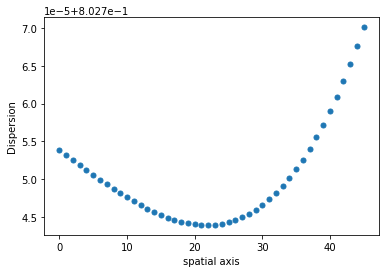

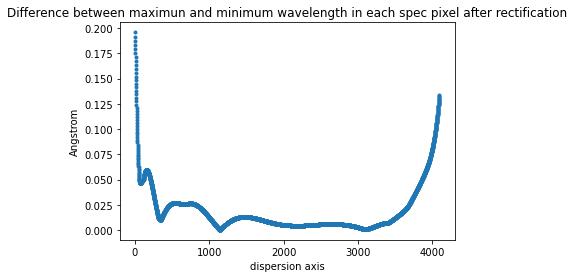


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 66 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


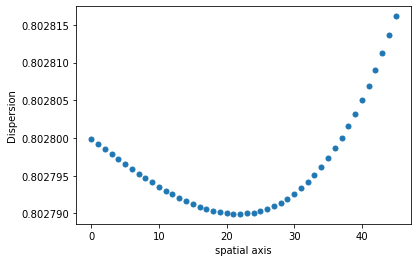

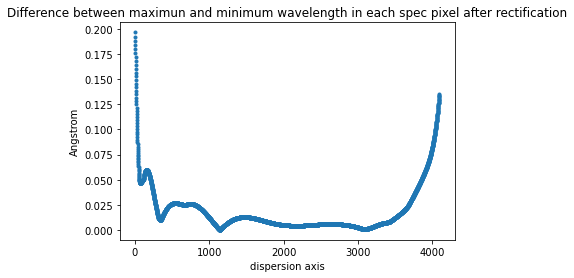


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 66 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


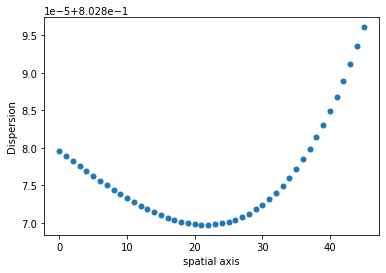

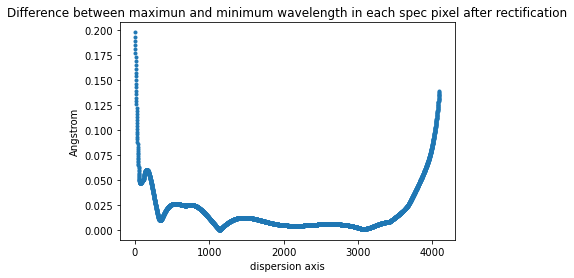


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 66 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


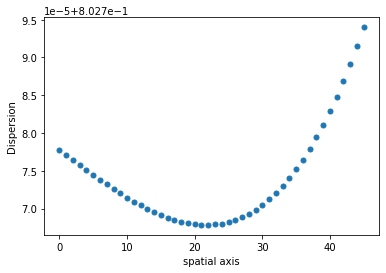

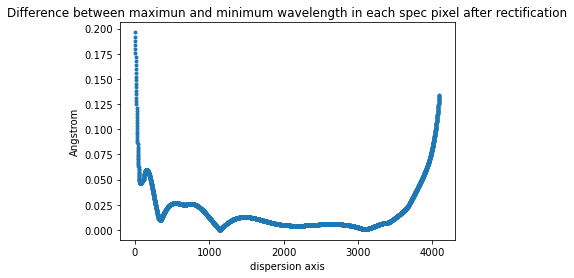

In [6]:
for sp in spec_list:
    sp.set_dispaxis('y')
    sp.do_waverect(doplot=True, resamp_ord=1, wavext=3)
    plt.show()

Profile max value (before normalization) 175.836609


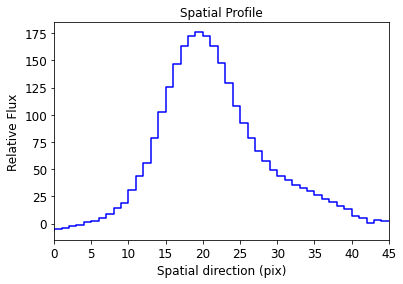

Profile max value (before normalization) 185.909775


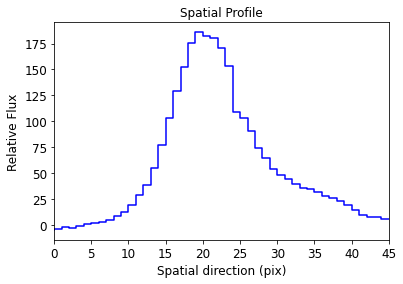

Profile max value (before normalization) 176.935303


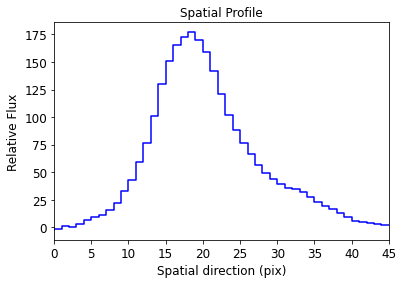

Profile max value (before normalization) 152.689636


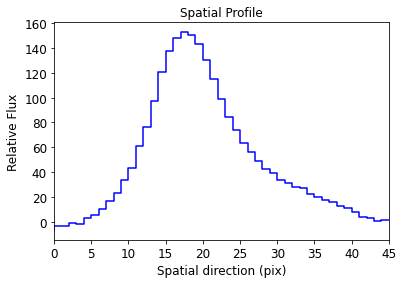

In [7]:
for sp in spec_list:
    sp.data = sp.data + 35
    sp.spatial_profile(pixrange=[2100, 2400])
    plt.show()
    #sp.initial_model()

Profile max value (before normalization) 175.836609


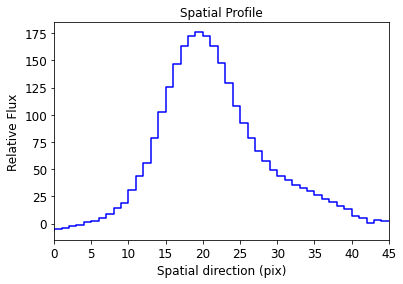


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 50, 27, 2

amplitude=50.000000, mu=27.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 175, 19, 3, 4

amplitude=175.000000, x_0=19.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 34.3, 3, 4

amplitude=40.000000, x_0=34.300000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

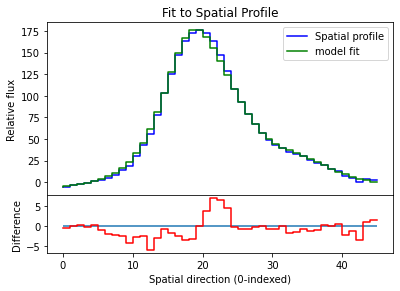

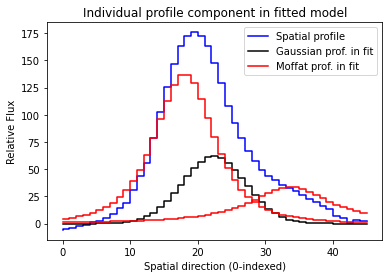


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 185.909775


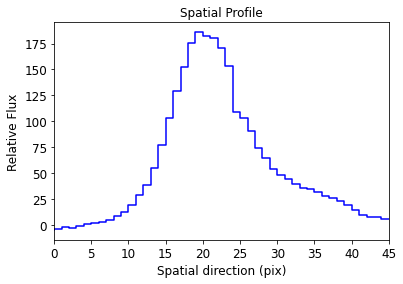


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 80, 28, 2 

amplitude=80.000000, mu=28.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 185, 20, 3, 4

amplitude=185.000000, x_0=20.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 35.3, 3, 4

amplitude=40.000000, x_0=35.300000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + 

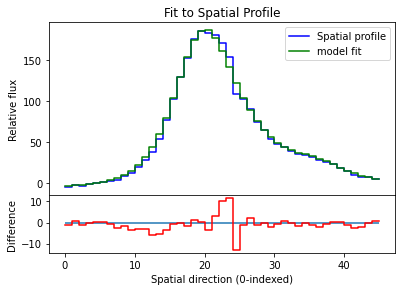

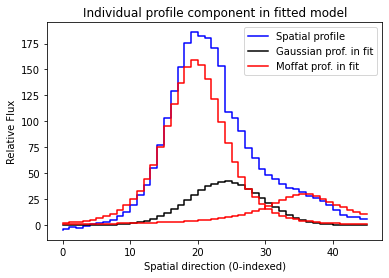


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 176.935303


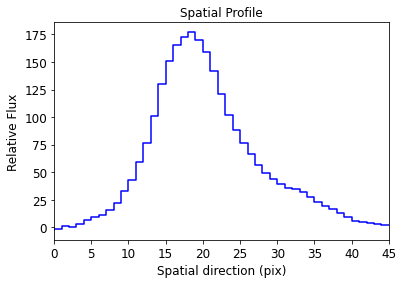


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 50, 25, 2

amplitude=50.000000, mu=25.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 176, 17, 3, 4

amplitude=176.000000, x_0=17.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 31.7, 3, 4

amplitude=40.000000, x_0=31.700000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

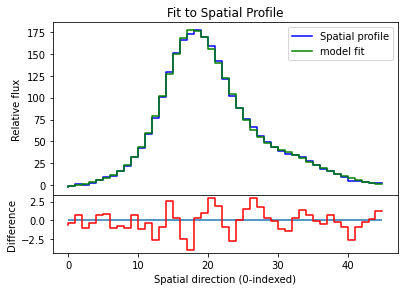

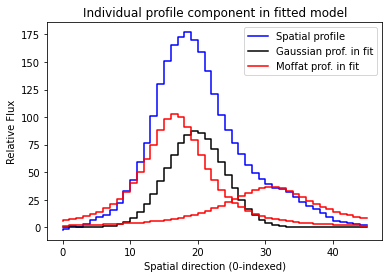


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 152.689636


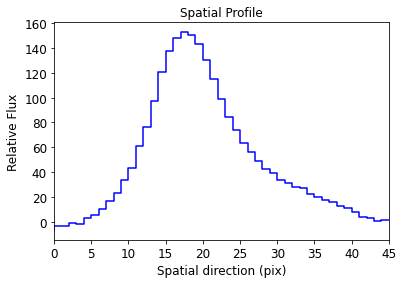


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 60, 24, 3

amplitude=60.000000, mu=24.000000, sigma=3.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 152, 16, 3, 4

amplitude=152.000000, x_0=16.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 30, 31.3, 3, 4

amplitude=30.000000, x_0=31.300000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

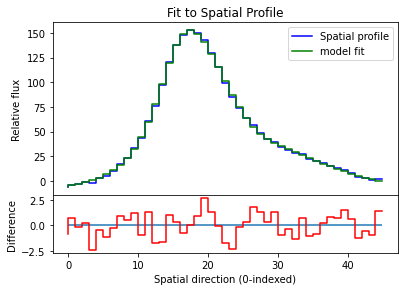

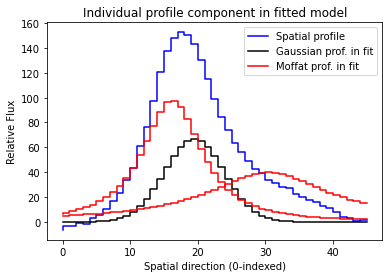


Do you want to start over ? : type yes/no
no


In [8]:
in_mod = []
for sp in spec_list:
    sp.spatial_profile(pixrange=[2100, 2400])
    plt.show()
    mod = sp.initial_model()
    in_mod.append(mod)

Profile max value (before normalization) 175.836609


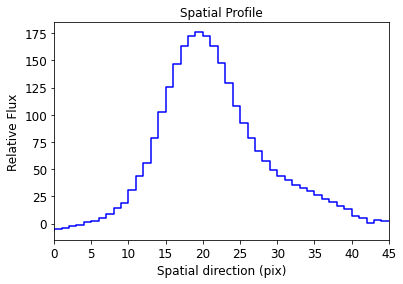


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 50, 27, 2

amplitude=50.000000, mu=27.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 175, 19, 3, 4

amplitude=175.000000, x_0=19.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 33.7, 3, 4

amplitude=40.000000, x_0=33.700000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

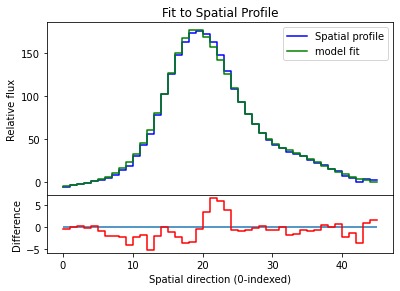

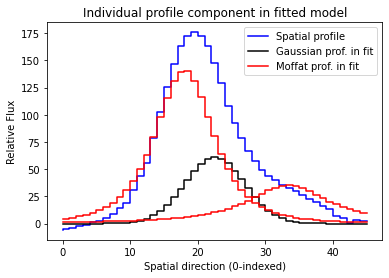


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 185.909775


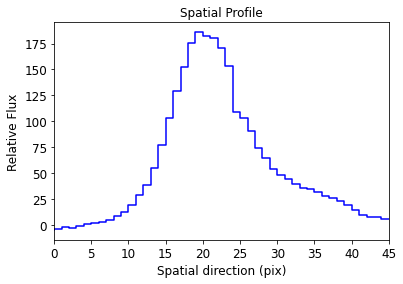


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -6

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 80, 26, 2 

amplitude=80.000000, mu=26.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 185, 20, 3, 4

amplitude=185.000000, x_0=20.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 34.7, 3, 4

amplitude=40.000000, x_0=34.700000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + 

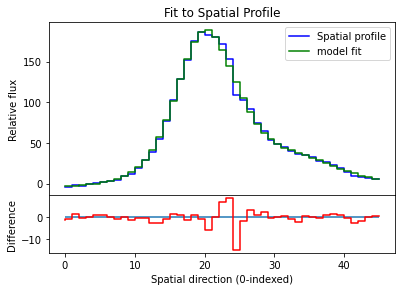

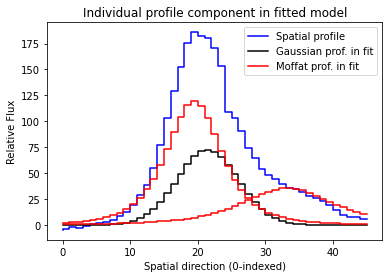


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 176.935303


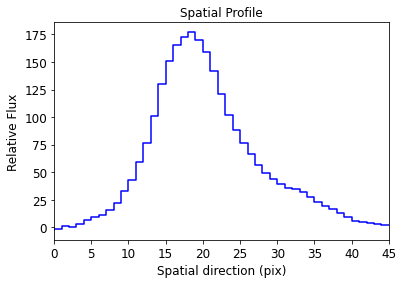


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -4

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 50, 25, 2

amplitude=50.000000, mu=25.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 176, 17, 3, 4

amplitude=176.000000, x_0=17.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 31.7, 3, 4

amplitude=40.000000, x_0=31.700000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

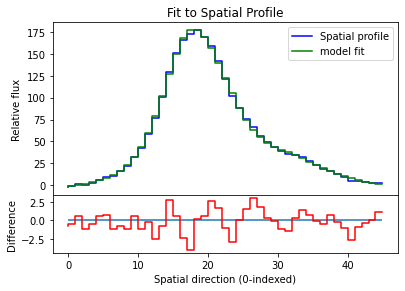

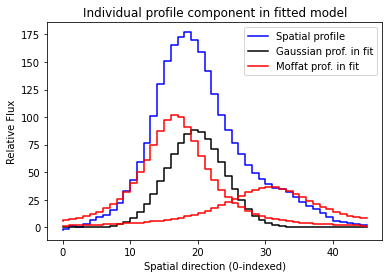


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 152.689636


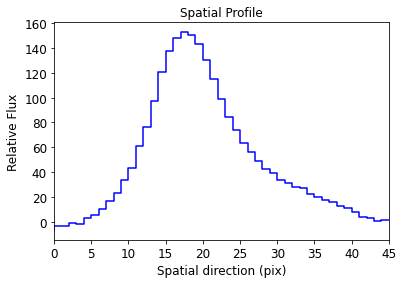


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -4

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 60, 25, 3

amplitude=60.000000, mu=25.000000, sigma=3.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 152, 16, 3, 4

amplitude=152.000000, x_0=16.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 30, 30.7, 3, 4

amplitude=30.000000, x_0=30.700000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [

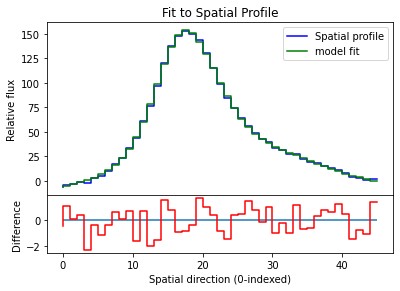

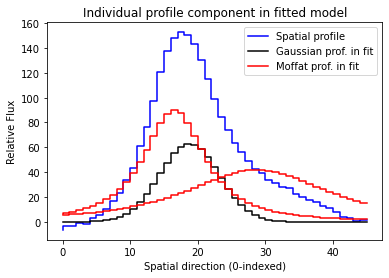


Do you want to start over ? : type yes/no
no


In [8]:
in_mod = []
for sp in spec_list:
    sp.spatial_profile(pixrange=[2100, 2400])
    plt.show()
    mod = sp.initial_model()
    in_mod.append(mod)


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-10.42432634)>

    [1]: <Gaussian1D(amplitude=61.8866091, mean=22.89682048, stddev=4.66888776)>

    [2]: <Moffat1D(amplitude=137.7404458, x_0=18.55017532, gamma=7.56373839, alpha=1.83115069)>

    [3]: <Moffat1D(amplitude=33.97389768, x_0=34.18907822, gamma=7.55020928, alpha=1.1159352)>
Parameters:
            c0_0           amplitude_1     ...      gamma_3           alpha_3      
    ------------------- ------------------ ... ----------------- ------------------
    -10.424326338283613 61.886609100931395 ... 7.550209275028753 1.1159351978816965

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.74087221)>

    [1]: <Gaussian1D(amplitude=22.06

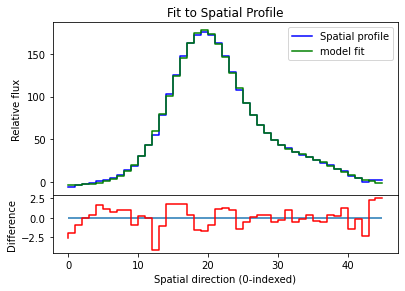

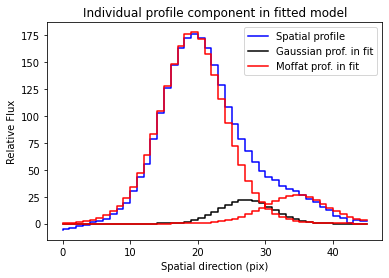


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-6.01801207)>

    [1]: <Gaussian1D(amplitude=42.08237773, mean=24.71713465, stddev=5.4557541)>

    [2]: <Moffat1D(amplitude=158.7399483, x_0=20.10118334, gamma=8.28932236, alpha=2.3308541)>

    [3]: <Moffat1D(amplitude=29.87958253, x_0=36.28400696, gamma=6.67640949, alpha=1.03229522)>
Parameters:
            c0_0           amplitude_1    ...     gamma_3          alpha_3      
    ------------------- ----------------- ... --------------- ------------------
    -6.0180120657641005 42.08237772947553 ... 6.6764094943106 1.0322952230254379

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.34322075)>

    [1]: <Gaussian1D(amplitude=41.68737229, me

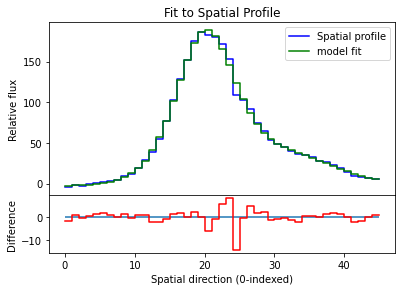

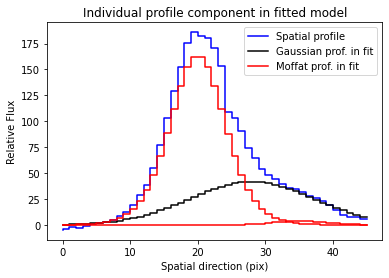


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-8.61125581)>

    [1]: <Gaussian1D(amplitude=87.41234322, mean=20.22620366, stddev=4.28984789)>

    [2]: <Moffat1D(amplitude=102.91968835, x_0=17.14490553, gamma=6.11024095, alpha=1.35290496)>

    [3]: <Moffat1D(amplitude=36.7926385, x_0=31.29545429, gamma=9.1090022, alpha=1.25675127)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3           alpha_3      
    ------------------ ----------------- ... ----------------- ------------------
    -8.611255805259926 87.41234322063424 ... 9.109002196130836 1.2567512744083995

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.2126661)>

    [1]: <Gaussian1D(amplitude=36.48950377,

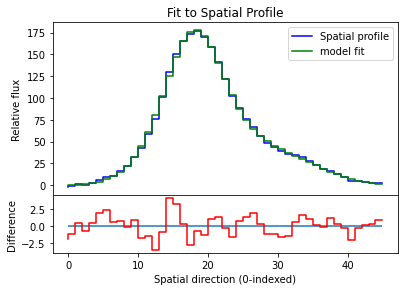

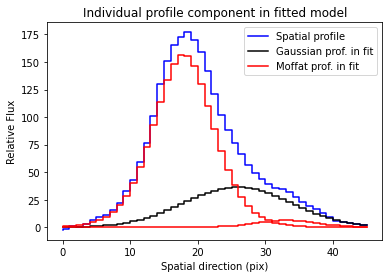


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-16.91125027)>

    [1]: <Gaussian1D(amplitude=66.98061631, mean=20.00195317, stddev=4.37201304)>

    [2]: <Moffat1D(amplitude=97.93019709, x_0=16.721727, gamma=6.00555065, alpha=1.24915298)>

    [3]: <Moffat1D(amplitude=39.82132369, x_0=30.94131418, gamma=10.37425807, alpha=0.93208929)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3            alpha_3      
    ------------------ ----------------- ... ------------------ ------------------
    -16.91125026510443 66.98061630721264 ... 10.374258074443677 0.9320892913836468

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.8138144)>

    [1]: <Gaussian1D(amplitude=21.34516

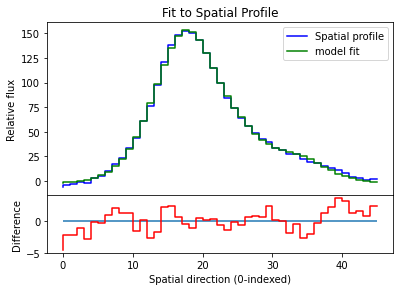

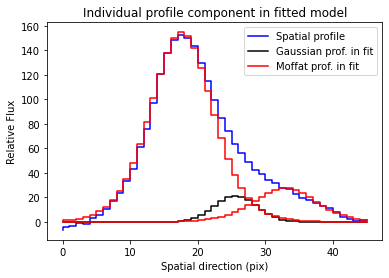

In [10]:
def tie_pos1_moffat(model):
     return model.x_0_2 + 15.3  #14.7
            
def tie_pos2_moffat(model):
    return model.x_0_2 + 8 #18.5; 7

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

for sp, mod in zip(spec_list, in_mod):
    mod[3].x_0.tied = tie_pos1_moffat
    mod[1].mean.tied = tie_pos2_moffat
    #sp.mod0[3].x_0.tied = tie_pos2_moffat
    #mod[3].x_0.tied = tie_pos2_moffat
    #sp.mod0[3].stddev.tied = tie_stddev_gauss
    #mod[3].gamma.tied = tie_gamma_moffat
    #mod[3].alpha.tied = tie_alpha_moffat
    mod[3].gamma.tied = tie_gamma_moffat
    mod[3].alpha.tied = tie_alpha_moffat
    sp.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 2 to parameter: gamma_2
Fitting polynomial of degree 2 to parameter: alpha_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 2 to parameter: gamma_3
Fitting polynomial of degree 2 to parameter: alpha_3


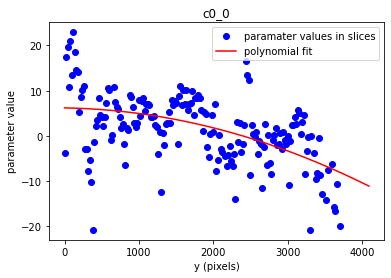

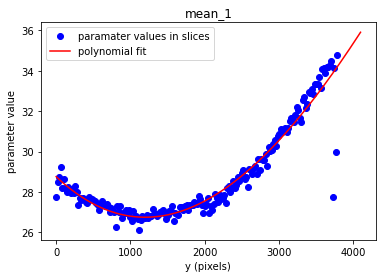

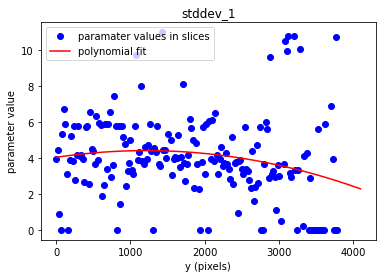

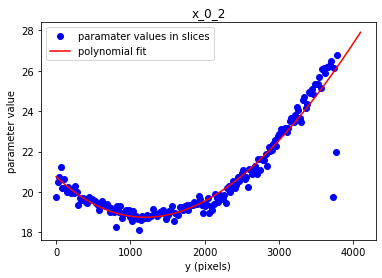

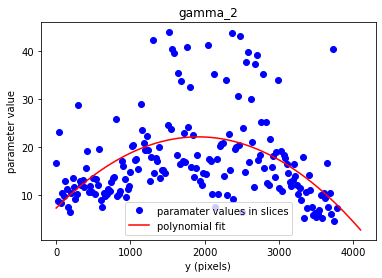

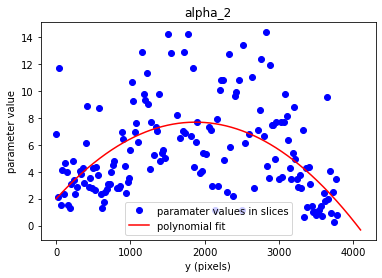

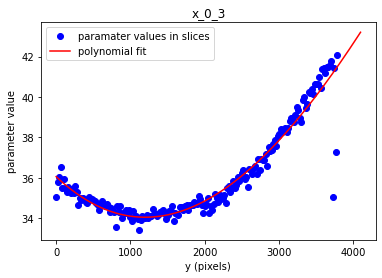

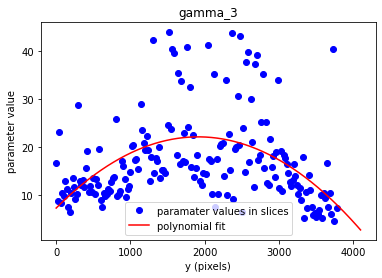

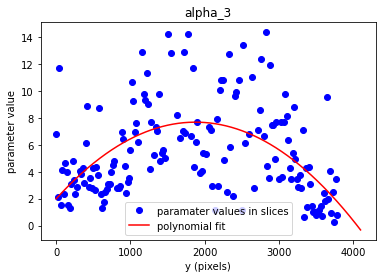


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 2 to parameter: gamma_2
Fitting polynomial of degree 2 to parameter: alpha_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 2 to parameter: gamma_3
Fitting polynomial of degree 2 to parameter: alpha_3


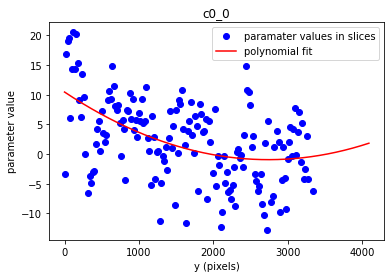

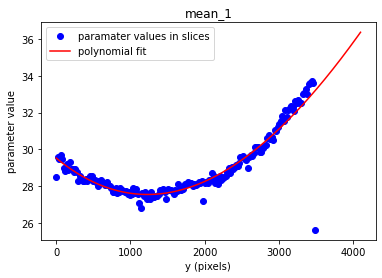

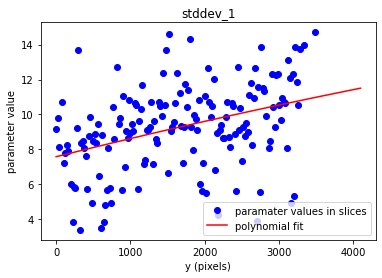

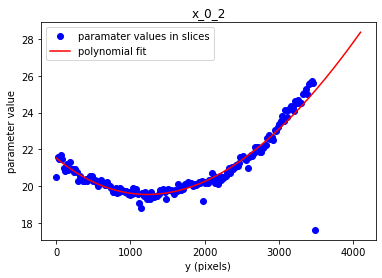

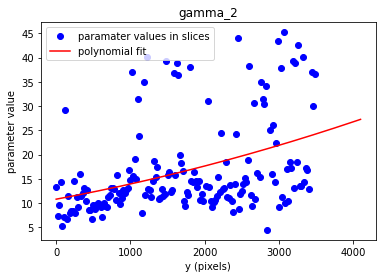

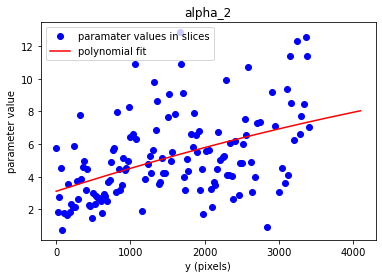

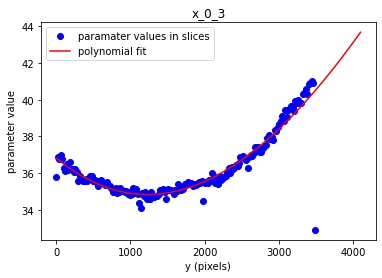

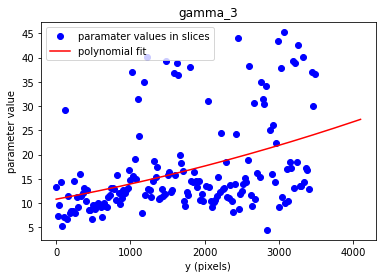

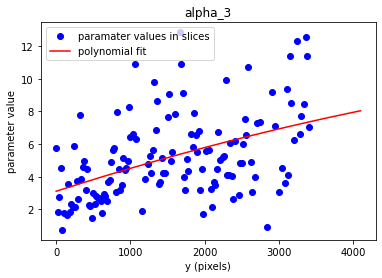


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 2 to parameter: gamma_2
Fitting polynomial of degree 2 to parameter: alpha_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 2 to parameter: gamma_3
Fitting polynomial of degree 2 to parameter: alpha_3


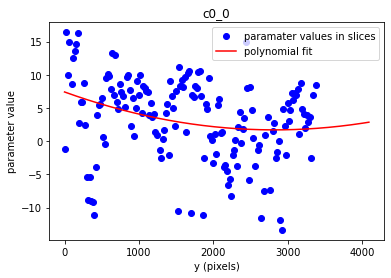

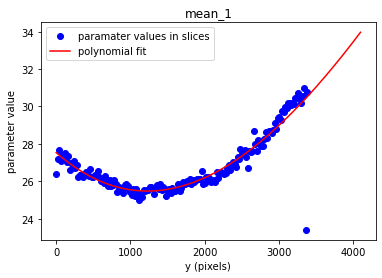

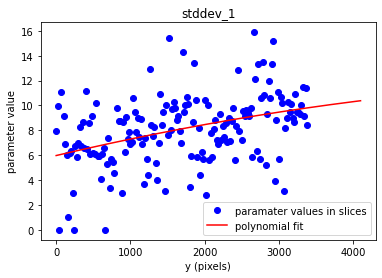

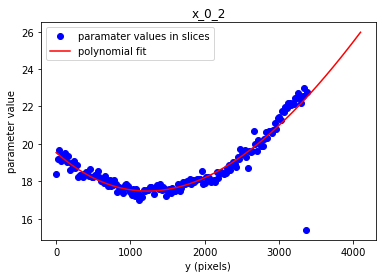

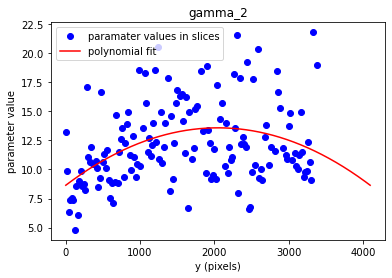

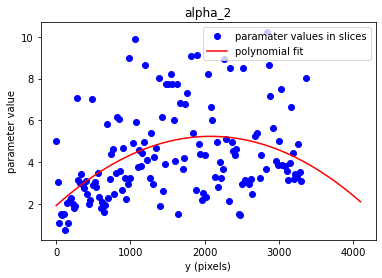

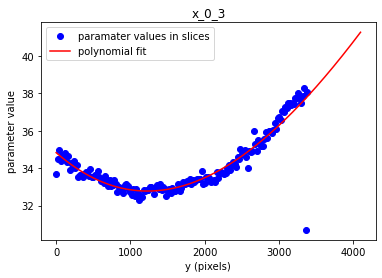

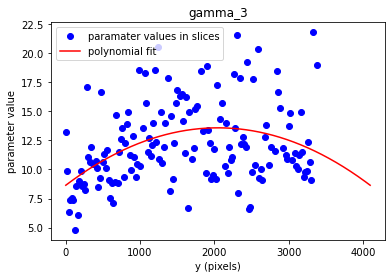

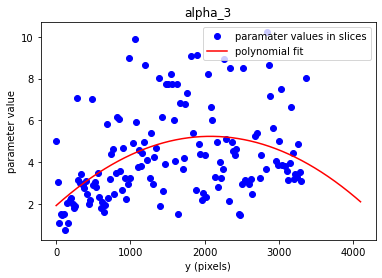


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 2 to parameter: gamma_2
Fitting polynomial of degree 2 to parameter: alpha_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 2 to parameter: gamma_3
Fitting polynomial of degree 2 to parameter: alpha_3


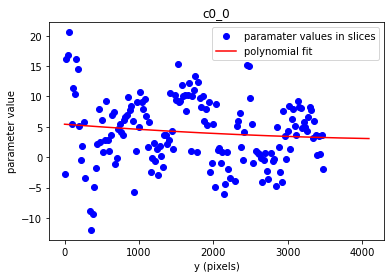

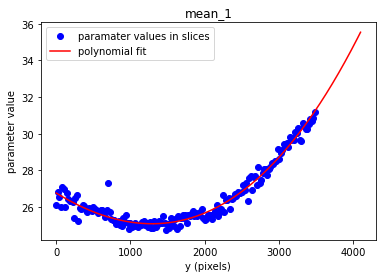

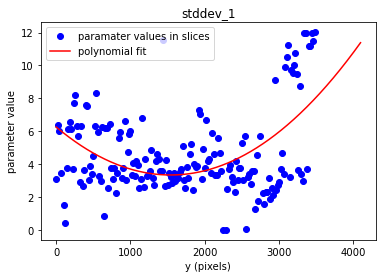

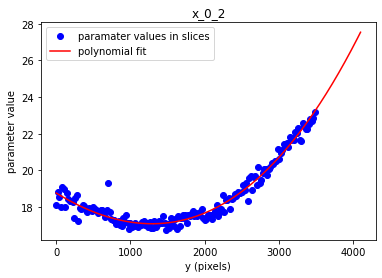

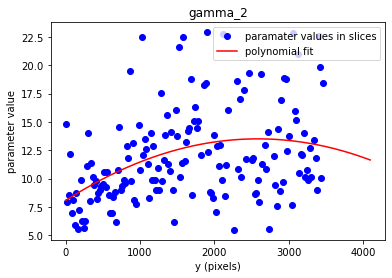

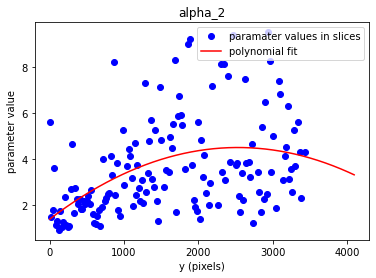

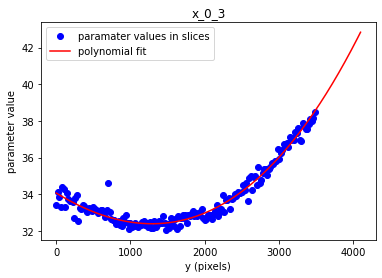

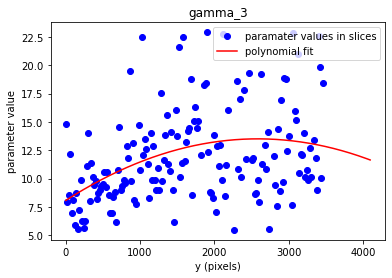

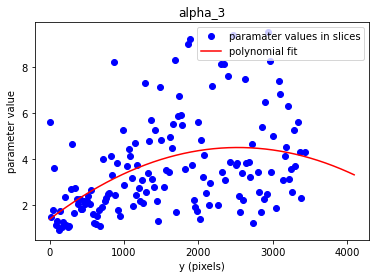

In [12]:
fitrange_list = np.array([[0, 3800], [0, 3500], [0, 3400], [0, 3500]])
for sp, fitran in zip(spec_list, fitrange_list):
    sp.find_and_trace(sp.mod0, stepsize=20 , polyorder=2, fitrange=fitran, 
                    fitorder={'x_0_1' : 3, 'x_0_2':3, 'x_0_3':3, 'mean_1': 3})
    plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 3900
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5772.30
 Spectrum End:     8891.58
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5772.30
 Spectrum End:     8891.58
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5772.30
 Spectrum End:     8891.58
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


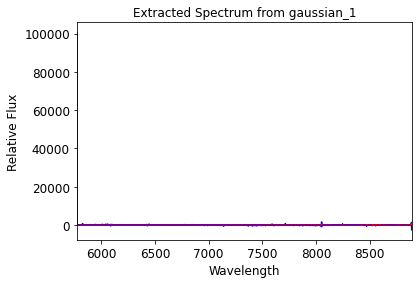

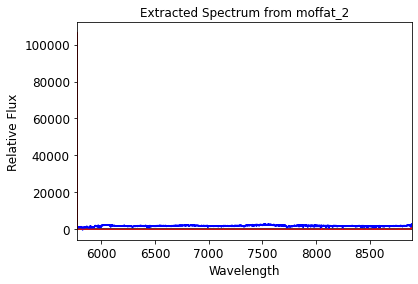

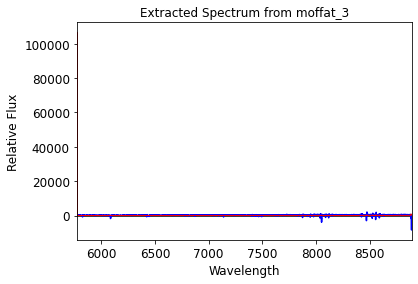

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 3900
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5778.29
 Spectrum End:     8897.57
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5778.29
 Spectrum End:     8897.57
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5778.29
 Spectrum End:     8897.57
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


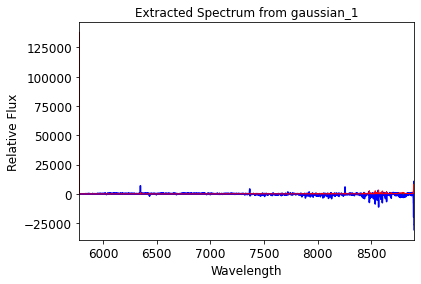

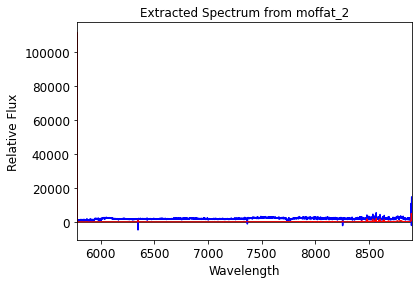

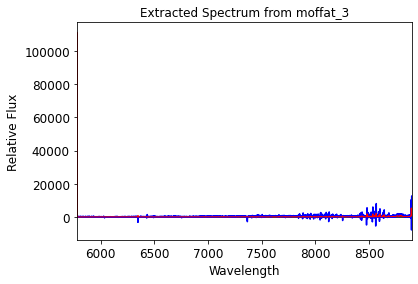

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 3900
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5788.99
 Spectrum End:     8908.27
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5788.99
 Spectrum End:     8908.27
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5788.99
 Spectrum End:     8908.27
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


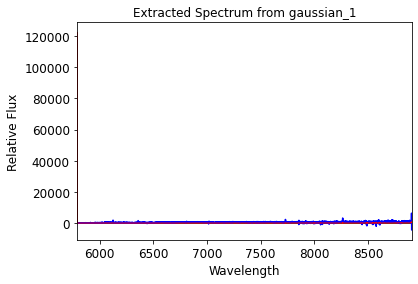

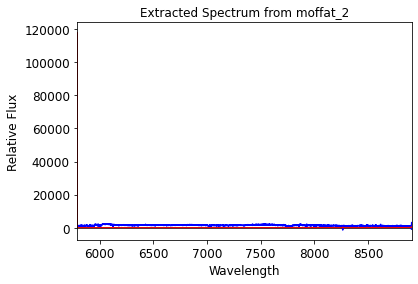

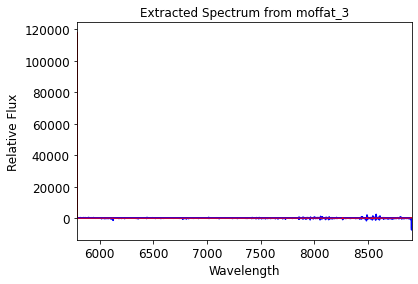

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 3900
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5775.46
 Spectrum End:     8894.74
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5775.46
 Spectrum End:     8894.74
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5775.46
 Spectrum End:     8894.74
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


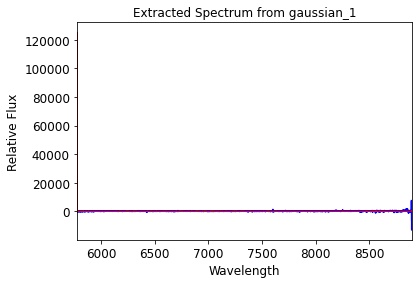

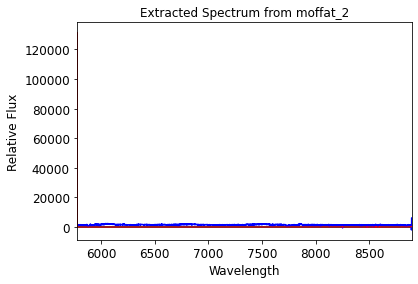

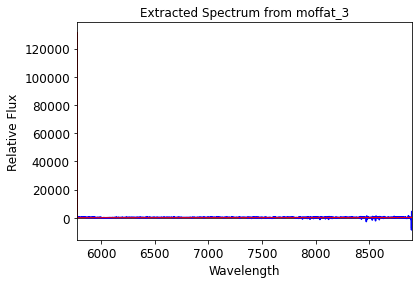

In [13]:
#spec1.extract(outfile=out_file[1], outformat='fits')
for sp in spec_list:
    sp.extract(method='modelfit', extrange=[0, 3900])
    plt.show()

 Spectrum Start:  5776.21
 Spectrum End:     8771.59
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



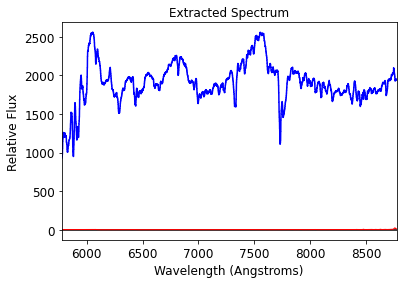

 Spectrum Start:  5776.21
 Spectrum End:     8771.59
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



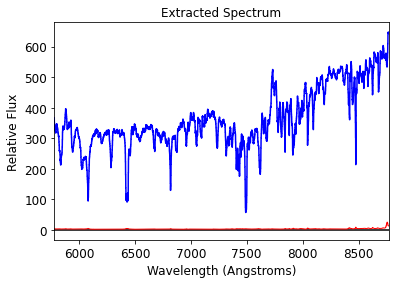

 Spectrum Start:  5782.20
 Spectrum End:     8777.58
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



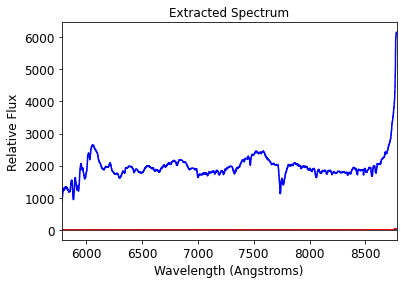

 Spectrum Start:  5782.20
 Spectrum End:     8777.58
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



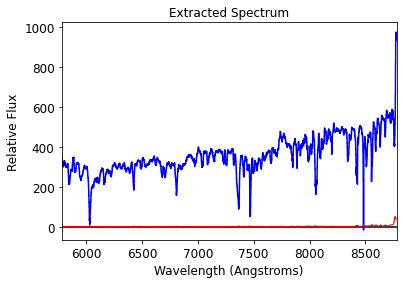

 Spectrum Start:  5792.90
 Spectrum End:     8788.28
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



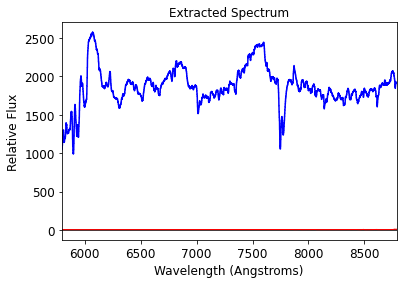

 Spectrum Start:  5792.90
 Spectrum End:     8788.28
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



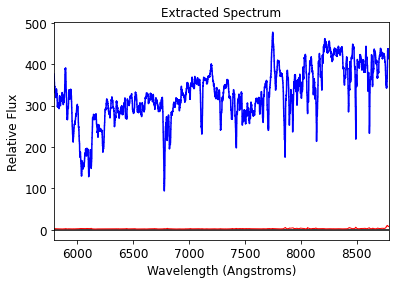

 Spectrum Start:  5779.37
 Spectrum End:     8774.75
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



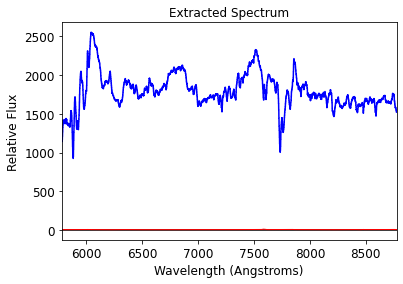

 Spectrum Start:  5779.37
 Spectrum End:     8774.75
 Dispersion (1st pixel):   0.79
 Dispersion (average):      0.80



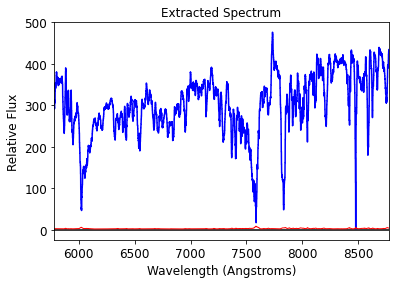

In [23]:
for sp in spec_list:
    for spec in sp.spectra:
        sp_d = spec1d.Spec1d(wav=spec[1]['wav'], flux=spec[1]['flux'],
                     var=spec[1]['var'], trimsec=[5, -250])
        sp_d.smooth(21)
        plt.show()

In [50]:
resp_sp = spec1d.Spec1d('../other_spectra/response_curve_from_feige110_r12132020.txt')


Reading spectrum from ../other_spectra/response_curve_from_feige110_r12132020.txt
Expected file format: text
 Spectrum Start:  5649.45
 Spectrum End:     8924.96
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



Extracted Spectrum from moffat_1
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


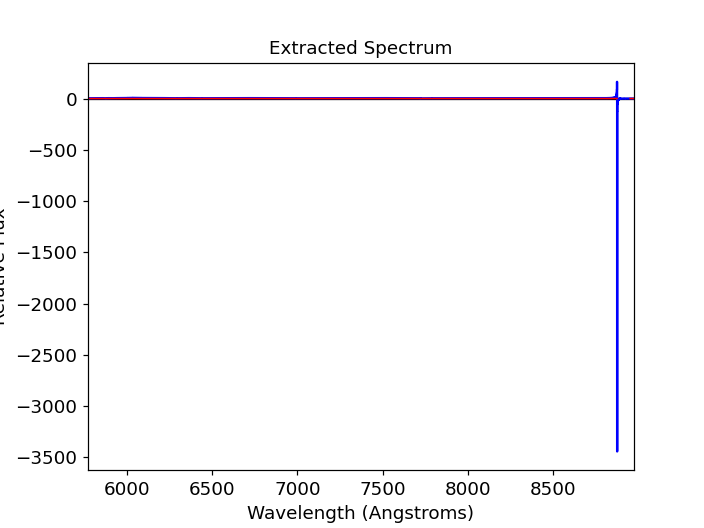

Extracted Spectrum from moffat_2
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


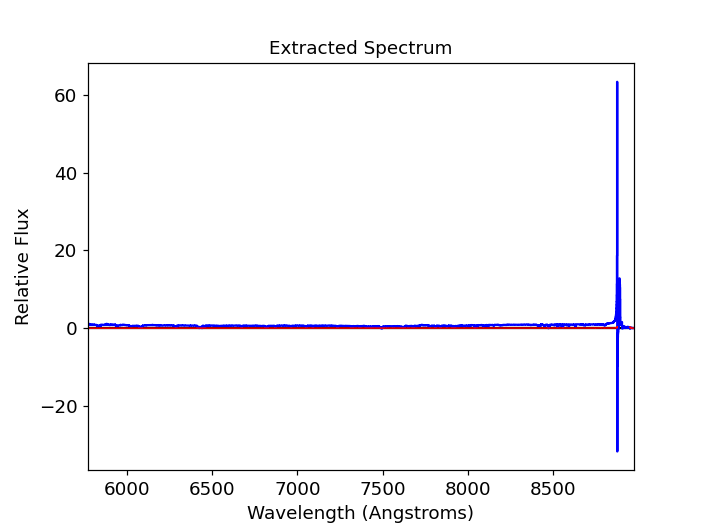

Extracted Spectrum from moffat_1
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


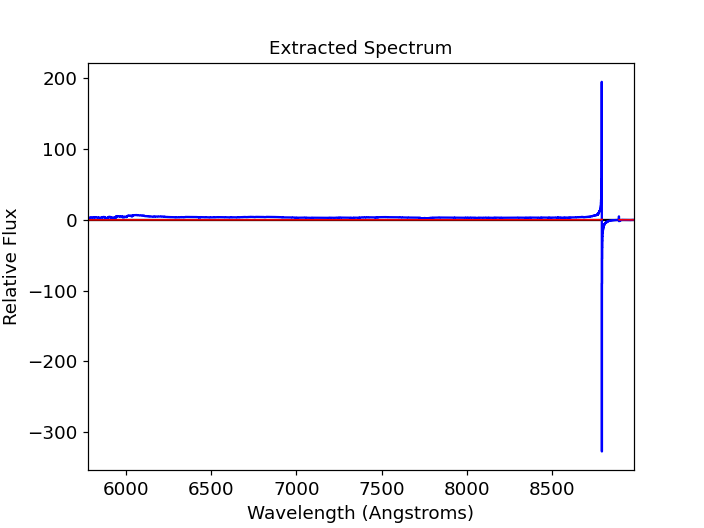

Extracted Spectrum from moffat_2
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


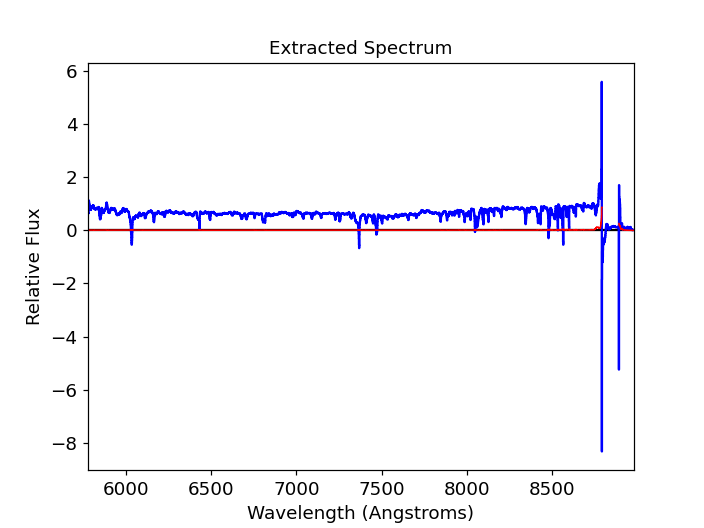

Extracted Spectrum from moffat_1
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


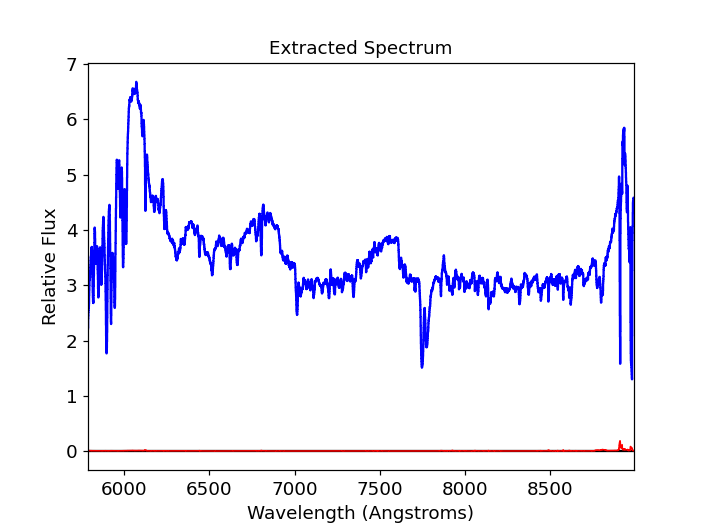

Extracted Spectrum from moffat_2
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


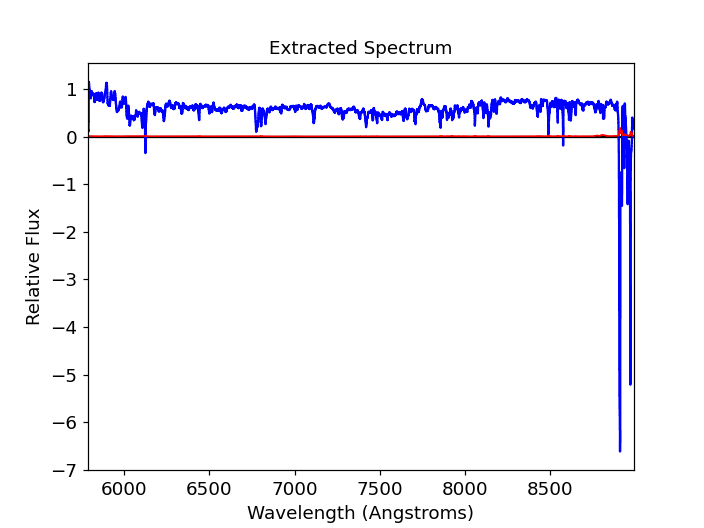

Extracted Spectrum from moffat_1
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


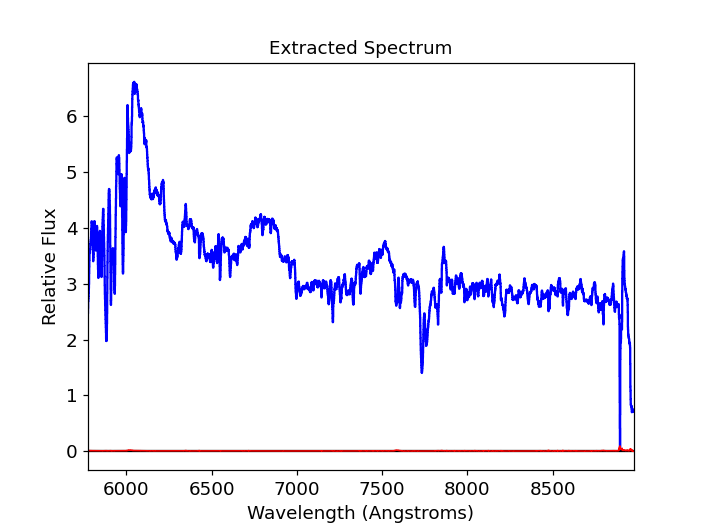

Extracted Spectrum from moffat_2
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


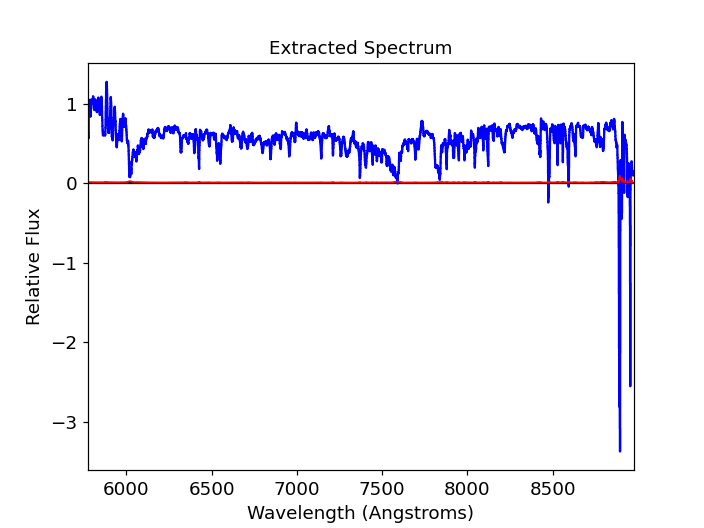

In [51]:
for sp in spec_list:
    for spec in sp.spectra:
        print(spec[0])
        resp_sp.resample(owave=spec[1]['wav'])
        spec[1].resp_corr(resp_sp.rsflux*10**-2, action='divide')
        spec[1].smooth(11)
        plt.show()

In [52]:
coadd_de = spec4.spectra[1][1]
#coadd_other = spec5.spectra[1][1]
coadd_im = spec4.spectra[0][1]

In [53]:
for sp in spec_list:
    for i, spec in enumerate(sp.spectra):
        spec[1].resample(owave=coadd_de['wav'], resamp_var=True)
        resampled_sp = spec1d.Spec1d(wav=spec[1].rswav, flux=spec[1].rsflux, var=spec[1].rsvar)
        if i==1:
            coadd_de = coadd_de.__add__(resampled_sp)
        #elif i==1:
            #coadd_other = coadd_other.__add__(resampled_sp)
        else:
            coadd_im = coadd_im.__add__(resampled_sp)

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.46
 Spectrum End:     8974.69
 

In [64]:
sp_d = spec1d.Spec1d(wav=coadd_de['wav'], flux=coadd_de['flux'], 
                     var=coadd_de['var'], trimsec=[0, -120])
#sp_d = spec1d.Spec1d(wav=spec3.spectra[1][1]['wav'], flux=spec3.spectra[1][1]['flux'], 
#                     var=spec3.spectra[1][1]['var'], trimsec=[10, -120])

 Spectrum Start:  5775.46
 Spectrum End:     8878.75
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


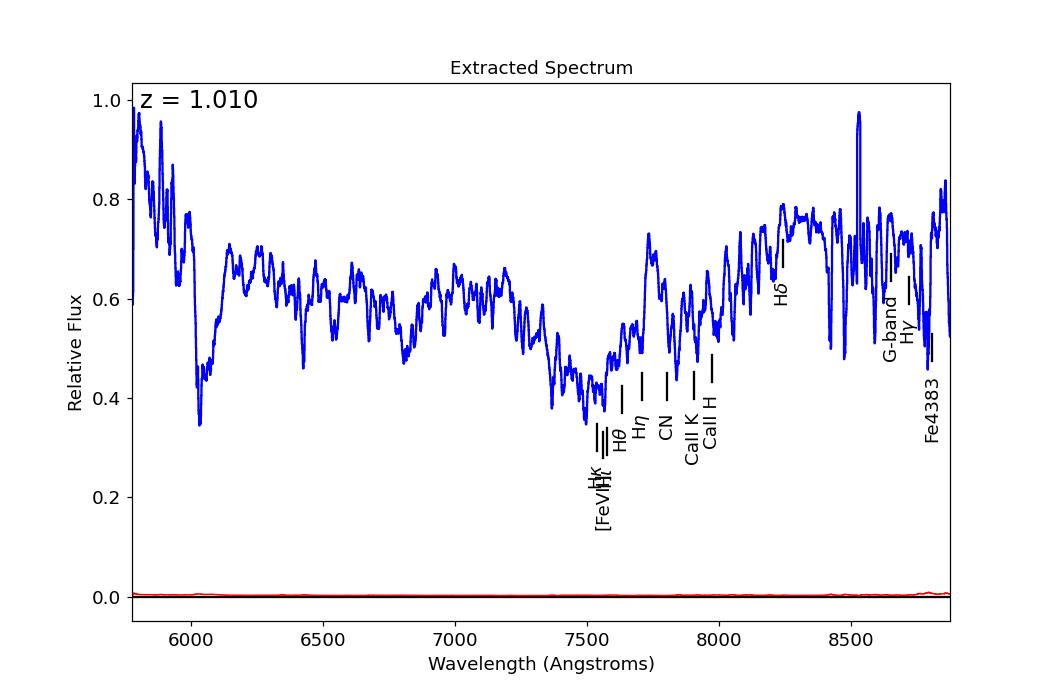


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       7537.50
[Fe VII]      3761.40       7560.41
H-iota        3770.00       7577.70
H-theta       3797.00       7631.97
H-eta         3835.00       7708.35
CN bandhd     3883.00       7804.83
CaII K        3933.67       7906.68
CaII H        3968.47       7976.62
H-delta       4101.00       8243.01
G-band        4305.00       8653.05
H-gamma       4340.00       8723.40
Fe4383        4383.00       8809.83



In [69]:
%matplotlib notebook
sp_d.smooth(15)
sp_d.mark_lines('abs', z=1.01, usesmooth=True)

In [1]:
sp_d1 = spec1d.Spec1d(wav=spec1.spectra[2][1]['wav'], flux=spec1.spectra[2][1]['flux'], 
                    var=spec1.spectra[2][1]['var'], trimsec=[10, -180])

NameError: name 'spec1d' is not defined

In [2]:
%matplotlib notebook
sp_d1.smooth(31)
sp_d1.mark_lines('abs', z=1.057, usesmooth=True) #0.641, 0.817
#sp_d1.mark_lines('strongem', z=3.8, usesmooth=True) #0.641, 0.817

NameError: name 'sp_d1' is not defined

Extracted Spectrum from moffat_1
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


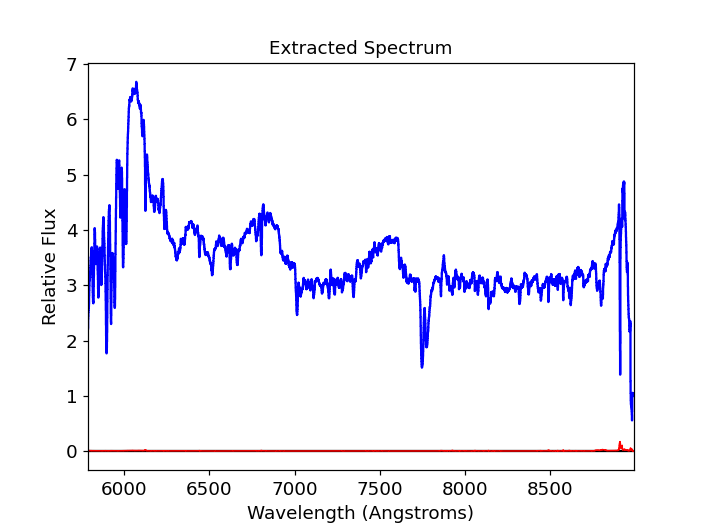

Extracted Spectrum from moffat_2
resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


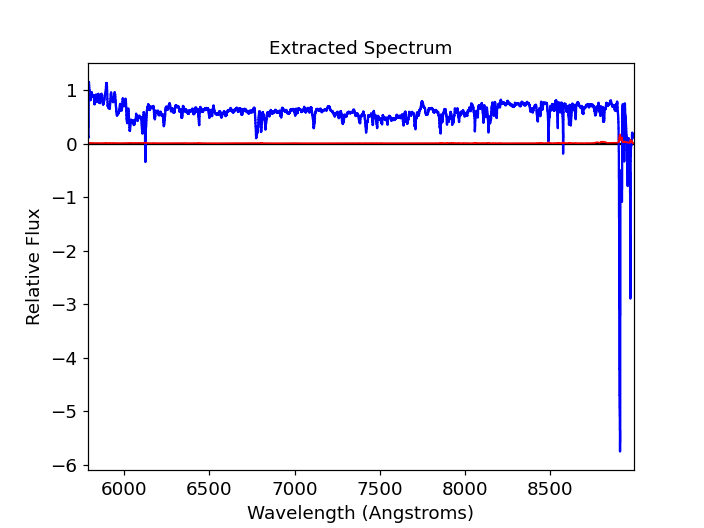

In [51]:
#for sp in spec_list:
for sp in spec3.spectra:
    print(sp[0])
    resp_sp.resample(owave=sp[1]['wav'])
    sp[1].resp_corr(resp_sp.rsflux*10**-2, action='divide')
    sp[1].smooth(11)
    plt.show()

In [71]:
ymod = interpolate.splrep(self.x, self.y)
yout = interpolate.splev(xout, ymod)

NameError: name 'interpolate' is not defined

In [11]:
file_loc1 = '0053m1_lens_spectra/*'

In [12]:
file_list1 = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc1)):
    if 'spec1d' in p and  '0053m1' in p:
        #if '.fits' in p:
        file_list1.append(p)
file_list1

['0053m1_lens_spectra/0053m1_lens_r0026a_spec1d.fits',
 '0053m1_lens_spectra/0053m1_lens_r0027_spec1d.fits',
 '0053m1_lens_spectra/0053m1_lens_r0028_spec1d.fits',
 '0053m1_lens_spectra/0053m1_lens_r0026b_spec1d.fits']

In [13]:
spec = spec1d.Spec1d(file_list1[2], informat='fits') 


Reading spectrum from 0053m1_lens_spectra/0053m1_lens_r0028_spec1d.fits
Expected file format: fits
 Spectrum Start:  5775.40
 Spectrum End:     9051.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [5]:
for i, p in enumerate(file_list1):
    if i!=2 :
        spec1 = spec1d.Spec1d(p, informat='fits')
        spec1.resample(owave=spec['wav'], resamp_var=True)
        #spec1.smooth(3)
        #print(spec1.rswav)
        #print(spec1['flux'][30:50])
        #print(spec1.rsflux[30:50])
        #plt.figure()
        #plt.plot(spec1.rswav[:-10], spec1.rsflux[:-10])
        #var_mod = interpolate.splrep(spec1['wav'], spec1['var'])
        #var_out = interpolate.splev(spec['wav'], var_mod)
        #print(spec1['var'])
        #print(var_out)
        spec_resmp = spec1d.Spec1d(wav=spec1.rswav, flux=spec1.rsflux, var=spec1.rsvar)
        #spec_resmp.smooth(3)
        spec= spec.__add__(spec_resmp)


Reading spectrum from 0053m1_lens_spectra/0053m1_lens_r0026a_spec1d.fits
Expected file format: fits
 Spectrum Start:  5772.24
 Spectrum End:     9048.23
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.40
 Spectrum End:     9051.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5775.40
 Spectrum End:     9051.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from 0053m1_lens_spectra/0053m1_lens_r0027_spec1d.fits
Expected file format: fits
 Spectrum Start:  5788.93
 Spectrum End:     9064.92
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

resample: replacing input spectrum with resampled version
 Spectrum Start:  5775.40
 Spectrum End:     9051.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5775.40
 Spectrum End:     9051.39
 Dispersion (1st pixel):   0.80
 Di

<IPython.core.display.Javascript object>


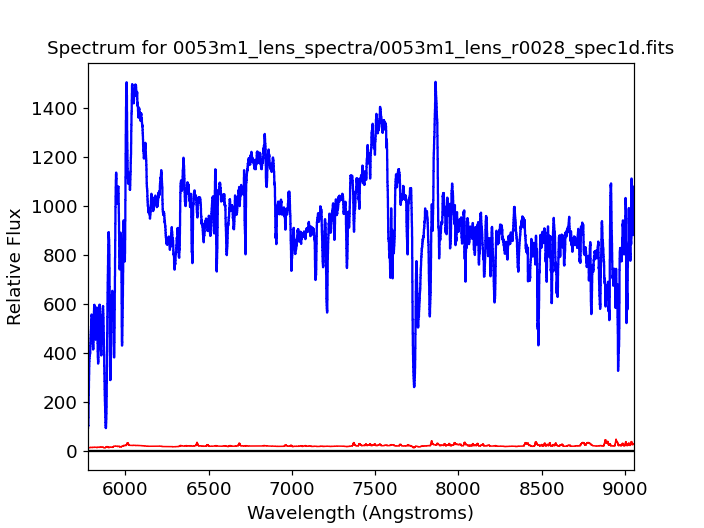

In [14]:
%matplotlib notebook
spec.smooth(11)
#spec.mark_lines('abs', z=3.8, usesmooth=True)
#spec.mark_lines('strongem', z=3.8, usesmooth=True)
#spec.mark_lines('em', z=3.8, usesmooth=True)

In [ ]:
spec.smooth(3)

In [ ]:
sp = pf.open(file_list[0])

In [ ]:
sp[19].header